# PART I

## Some Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score
from keras.datasets import mnist

warnings.filterwarnings('ignore')

2024-05-11 00:00:48.622633: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-11 00:00:48.721111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 00:00:50.564372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

idx = np.random.permutation(len(X_train))  # Get a portion of the data with random
idy = np.random.permutation(len(X_test))  # Get a portion of the data with random
X_train_subset = X_train[idx][:1000]
y_train_subset = y_train[idx][:1000]

X_test_subset = X_test[idy][:1000]
y_test_subset = y_test[idy][:1000]

In [3]:
print('MNIST Dataset Shape:\n')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))
print('X_train_subset: ' + str(X_train_subset.shape))

MNIST Dataset Shape:

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train_subset: (1000, 28, 28)


### For an images has 28x28 pixels = 784px. So reshape 2 dimension.

In [4]:
X_train_subset = X_train_subset.reshape(1000, 784)
X_train_subset = X_train_subset.astype('float32')  # Change integers to 32-bit floating point numbers
print("Training X_train matrix shape", X_train_subset.shape)

Training X_train matrix shape (1000, 784)


In [5]:
def transform(components, mean, X):
    # projects data
    X = X - mean
    return np.dot(X, components.T)


def pca(X_train_subset, n_components=4):
    X = X_train_subset  # Get data

    mean = np.mean(X, axis=0)  # mean centering
    X = X - mean

    cov = np.cov(X.T)  # covariance, functions needs samples as columns

    eigenvectors, eigenvalues = np.linalg.eig(cov)  # eigenvectors, eigenvalues
    eigenvectors = eigenvectors.T  # eigenvectors v = [:, i] column vector, transpose this for easier calculations

    idxs = np.argsort(eigenvalues)[::-1]  # sort eigenvectors
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    components = eigenvectors[:n_components]

    X_projected = transform(components, mean, X)  # Project the data onto the 4 primary principal components

    return mean, eigenvalues, X_projected

In [6]:
mean, weights, vectors = pca(X_train_subset)

print("Shape of X:", X_train_subset.shape)
print("Shape of transformed X:", vectors.shape)

Shape of X: (1000, 784)
Shape of transformed X: (1000, 4)


In [7]:
x1 = vectors[:, 0]
x2 = vectors[:, 1]
x3 = vectors[:, 2]

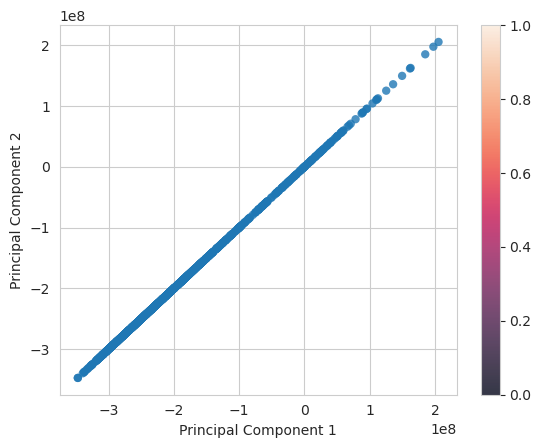

In [8]:
plt.scatter(x1, x2, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

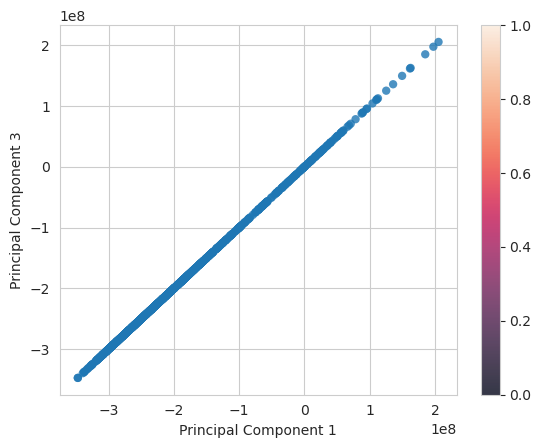

In [9]:
plt.scatter(x1, x3, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.colorbar()
plt.show()

In [10]:
reducedData = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y_train_subset})


In [11]:
reducedData

,x1,x2,x3,y
0,-2.201738e+08-3.735665e- 11j,-2.201732e+08-3.735665e- 11j,-2.202439e+08+3.971105e- 11j,1
1,-6.437386e+07-4.211659e- 11j,-6.437334e+07-4.211659e- 11j,-6.445185e+07+4.612162e- 11j,2
2,-2.582926e+08-3.951392e- 11j,-2.582948e+08-3.951392e- 11j,-2.582290e+08+4.285307e- 11j,9
3,-1.858358e+08+1.110142e- 11j,-1.858353e+08+1.110142e- 11j,-1.859143e+08-1.542134e- 11j,8
4,-1.793075e+08-2.875283e- 11j,-1.793070e+08-2.875283e- 11j,-1.793780e+08-1.475705e- 11j,6
...,...,...,...,...
995,-2.466404e+08-5.098391e- 11j,-2.466398e+08-5.098391e- 11j,-2.465633e+08+3.944234e- 11j,3
996,-3.109114e+08-2.845244e- 11j,-3.109109e+08-2.845244e- 11j,-3.109754e+08-1.144557e- 11j,5
997,-1.209620e+08-7.549955e- 12j,-1.209615e+08-7.549955e- 12j,-1.210331e+08-1.133693e- 11j,6
998,-2.584880e+08-4.227014e- 11j,-2.584875e+08-4.227014e- 11j,-2.585566e+08+3.971105e- 11j,1


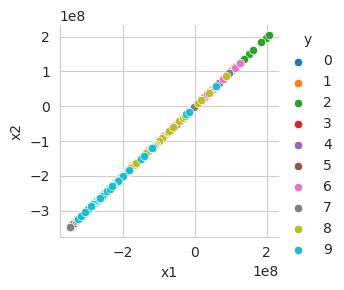

In [12]:
graphics = (sns.FacetGrid(reducedData, hue='y'))
graphics.map(sns.scatterplot, 'x1', 'x2')
graphics.add_legend()

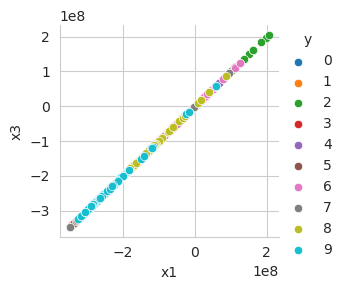

In [13]:
graphics = (sns.FacetGrid(reducedData, hue='y'))
graphics.map(sns.scatterplot, 'x1', 'x3')
graphics.add_legend()

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

n_components_list = [3, 5, 10, 20]
results = {}

clf = RandomForestClassifier(n_estimators=100, random_state=42)
X_real = reducedData.applymap(lambda x: x.real)

scores = cross_val_score(clf, X_real, reducedData['y'], cv=5)
results[3] = scores.mean()
print(results)

# You add 5, 10, 20 dynamically after HW3

{3: 1.0}


{10: 0.992, 50: 0.992, 100: 0.992, 200: 0.992}
